In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the data set to the pandas data frame work
credit_card_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [3]:
# fist 5 rows of the data set
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89215,62476,-0.815634,-0.244177,2.591455,-0.002720,-0.644497,0.418909,0.255767,0.115134,0.649661,...,-0.133162,-0.239654,0.095507,0.125146,-0.118362,1.077141,-0.173607,-0.148471,112.18,0.0
89216,62476,1.121527,0.208353,0.202133,1.138648,0.068794,-0.158828,0.176503,-0.105339,-0.145071,...,0.115269,0.354326,-0.179000,-0.240712,0.663680,-0.237553,0.031241,0.025737,53.64,0.0
89217,62478,-1.344549,0.543027,1.991882,-1.118447,-0.949264,0.196963,-0.070728,0.809195,0.331360,...,-0.134573,-0.417982,-0.071393,0.047068,0.267058,0.861676,0.067080,0.042724,69.00,0.0
89218,62480,0.789027,-1.180048,-0.633627,-0.141463,-0.317314,-0.124994,0.407588,-0.286734,-1.371513,...,-0.567100,-1.844598,-0.140709,-0.779335,0.129177,0.184364,-0.076960,0.060438,328.80,0.0
89219,62480,1.244599,-0.778287,-0.340844,-0.695168,-0.480820,-0.200516,-0.195502,-0.139240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#credit card Inforamtaion
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89220 entries, 0 to 89219
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    89220 non-null  int64  
 1   V1      89220 non-null  float64
 2   V2      89220 non-null  float64
 3   V3      89220 non-null  float64
 4   V4      89220 non-null  float64
 5   V5      89220 non-null  float64
 6   V6      89220 non-null  float64
 7   V7      89220 non-null  float64
 8   V8      89220 non-null  float64
 9   V9      89219 non-null  float64
 10  V10     89219 non-null  float64
 11  V11     89219 non-null  float64
 12  V12     89219 non-null  float64
 13  V13     89219 non-null  float64
 14  V14     89219 non-null  float64
 15  V15     89219 non-null  float64
 16  V16     89219 non-null  float64
 17  V17     89219 non-null  float64
 18  V18     89219 non-null  float64
 19  V19     89219 non-null  float64
 20  V20     89219 non-null  float64
 21  V21     89219 non-null  float64
 22

In [ ]:
#checking the number of missing values in each coloumn
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
#distribution of legit and fradulant transactions (no.Data present in the normal transaction and Fradulant transaction)
# 0 - Represent the Normal transaction
# 1 - Represent the Fradulant Transacations
credit_card_data['Class'].value_counts()

Class
0.0    89008
1.0      211
Name: count, dtype: int64

This Data  Set Is Highly unbalanced

* 0-Represent the Normal transaction.
* 1-Represent the FradulantTransacations.





In [7]:
#Sperating the data anaylsis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(89008, 31)
(211, 31)


In [9]:
#statistically measures of the data
legit.Amount.describe()

count    89008.000000
mean        98.512943
std        266.997060
min          0.000000
25%          7.680000
50%         26.990000
75%         89.900000
max      19656.530000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     211.000000
mean      106.714360
std       242.747461
min         0.000000
25%         1.000000
50%         7.580000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [11]:
#compare the values of both transanction classes
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,39725.791300,-0.250777,-0.049644,0.699949,0.151258,-0.268206,0.099001,-0.094268,0.048041,-0.021865,...,0.041170,-0.031722,-0.106688,-0.036941,0.009983,0.132377,0.026935,0.000029,0.002318,98.512943
1.0,35061.473934,-6.271827,4.319926,-8.267835,5.039289,-4.531270,-1.894723,-6.560321,2.863511,-2.998676,...,0.373573,0.740737,-0.137542,-0.236394,-0.102067,0.214617,0.094634,0.544401,0.042124,106.714360


Build the Sample Data set Contaning Similar Distribution Of Normal Transsactin and Fradulant transaction








* Number Of Fradulent Transacation-->211




In [12]:
legit_sample = legit.sample(n = 211)

Concatinating Two Data Frames

In [13]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [14]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36908,38727,-0.762736,1.464975,1.283560,2.610978,0.366433,0.227587,0.369460,0.039525,-1.363585,...,0.014435,0.186255,-0.074361,0.030213,-0.272349,0.098308,0.153016,0.288589,14.18,0.0
46079,42629,1.109104,0.163320,0.215165,1.107842,-0.133295,-0.481173,0.202108,-0.105647,-0.022833,...,0.083709,0.213920,-0.111080,0.088247,0.596388,-0.303719,0.021056,0.025196,52.00,0.0
1650,1274,-0.616095,1.510751,0.444664,0.855043,-0.103247,-0.527251,0.541776,0.062530,-0.710145,...,0.207733,0.484539,-0.091023,0.078398,-0.063662,-0.348023,-0.427474,-0.021742,30.89,0.0
78182,57403,-1.566501,0.636232,1.758416,1.762456,0.462333,-0.598372,0.812575,0.008022,-1.042663,...,0.135168,0.123333,-0.192369,0.266919,0.495940,0.002706,-0.109544,0.199997,129.61,0.0
21259,31558,1.163587,0.169774,0.693124,0.705658,-0.586339,-0.831340,-0.012543,-0.087399,0.046109,...,-0.193042,-0.559127,0.227953,0.593984,0.061102,0.091333,-0.015249,0.021836,9.99,0.0


In [15]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88258,62059,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,...,0.417762,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,6.62,1.0
88307,62080,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.00,1.0
88876,62330,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00,1.0
88897,62341,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1.0
89190,62467,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1.0


In [ ]:
new_dataset['Class'].value_counts()

Class
0.0    211
1.0    211
Name: count, dtype: int64

In [16]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37571.255924,-0.170293,0.090664,0.612685,0.078236,-0.311409,-0.052506,-0.014450,0.062371,0.028508,...,-0.001855,-0.052234,-0.140134,-0.025936,0.034972,0.185306,0.031267,-0.015311,-0.024571,85.264882
1.0,35061.473934,-6.271827,4.319926,-8.267835,5.039289,-4.531270,-1.894723,-6.560321,2.863511,-2.998676,...,0.373573,0.740737,-0.137542,-0.236394,-0.102067,0.214617,0.094634,0.544401,0.042124,106.714360


Spliting the Data Into Features Target

In [17]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
86556  61285  1.134427  0.215106  0.238588  1.113028 -0.370957 -0.522780   
9369   13683 -0.878570  1.771270  1.151172  2.039095  0.166865 -0.313390   
87149  61556  0.686226 -1.256374  0.571657  0.829380 -1.411226 -0.435069   
69286  53351  0.058954 -1.945350 -0.839532  0.550254 -1.006639 -1.031586   
813      619 -1.109297  1.323547  1.017411 -1.202051  0.405516 -0.194042   
...      ...       ...       ...       ...       ...       ...       ...   
88258  62059 -1.644403  3.129852 -2.576977  3.415573 -0.448525 -1.241893   
88307  62080 -1.599457  2.607720 -2.987193  3.064156 -2.497914 -0.541103   
88876  62330  1.140865  1.221317 -1.452955  2.067575  0.854742 -0.981223   
88897  62341 -5.267760  2.506719 -5.290925  4.886134 -3.343188 -1.100085   
89190  62467 -5.344665 -0.285760 -3.835616  5.337048 -7.609909  3.874668   

             V7        V8        V9  ...       V20       V21       V22  \
86556 -0.1464

In [18]:
print(Y)

36908    0.0
46079    0.0
1650     0.0
78182    0.0
21259    0.0
        ... 
88258    1.0
88307    1.0
88876    1.0
88897    1.0
89190    1.0
Name: Class, Length: 422, dtype: float64


Split The Data Into Tranning Data And Testing Data

In [19]:
X_train,X_test,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2, stratify=Y , random_state = 2)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(422, 30) (337, 30) (85, 30)


In [21]:
#Inspect whether the 2 sets are indeed stratified.
print(pd.Series(Y_train).value_counts(normalize = True))
print(pd.Series(Y_test).value_counts(normalize = True))

Class
1.0    0.501484
0.0    0.498516
Name: proportion, dtype: float64
Class
0.0    0.505882
1.0    0.494118
Name: proportion, dtype: float64


Model Traning

Logistical Resgression


In [ ]:
model = LogisticRegression()

In [ ]:
# @title Default title text
#tranning the Logistic Regression Model With Trannig data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
predicted_probabilities = np.random.rand(100)  # Replace this with your actual predicted probabilities

In [ ]:
Y_test = np.random.randint(0, 2, 100)  # Replace this with your actual test labels

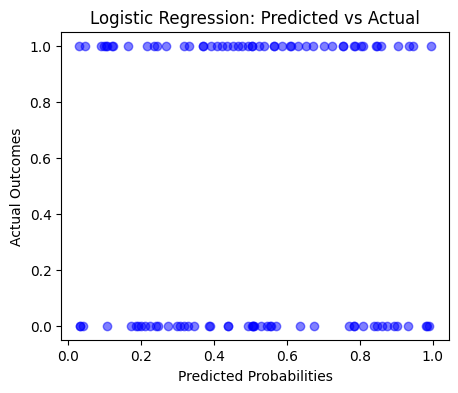

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your model and have the predicted probabilities
# Let's say you have them in a variable called predicted_probabilities
# You can obtain the predicted probabilities using model.predict_proba(X_test)
# predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Plotting the graph
plt.figure(figsize=(5, 4))
plt.scatter(predicted_probabilities, Y_test, color='blue', alpha=0.5)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Actual Outcomes')
plt.title('Logistic Regression: Predicted vs Actual')
plt.show()

In [22]:
lr = LogisticRegression(class_weight='balanced',max_iter=200, random_state=123)
lr.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=123)

**Evalution Of the Model**

Accuracy Score

In [ ]:
#aacuracy on Tranning Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [ ]:
print('Accuracy On Traning Data:', training_data_accuracy)

Accuracy On Traning Data: 0.9614243323442137


In [ ]:
credit_card_data["Amount"].describe()

count    89219.000000
mean        98.532339
std        266.941369
min          0.000000
25%          7.675000
50%         26.990000
75%         89.950000
max      19656.530000
Name: Amount, dtype: float64

**IT GIVES THE TRANSACTIONAL DATA WHICH IS FRAUD AND GENUINE**

In [ ]:
non_fraud = len(credit_card_data[credit_card_data.Class == 0])
fraud = len(credit_card_data[credit_card_data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  89008
Number of Fraud transactions:  211
Percentage of Fraud transactions: 0.2365


**ANAYLISIS OF FRAUD IN THE DATASET**

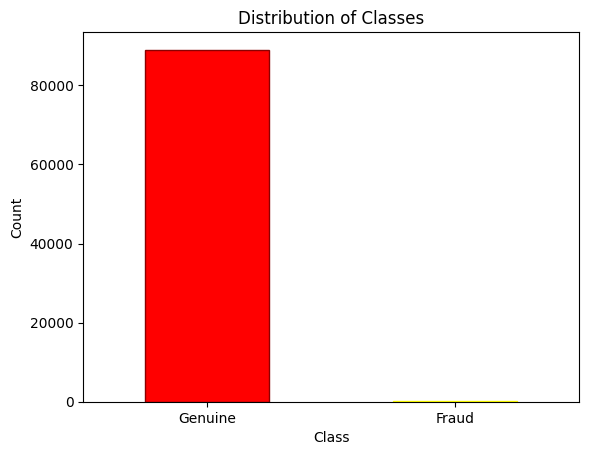

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming credit_card_data is a DataFrame containing the 'Class' column
# Replace this with your actual DataFrame if it's different

# Sample Data:
# credit_card_data = pd.DataFrame({'Class': ['Genuine', 'Fraud', 'Genuine', 'Genuine', 'Fraud']})

color = ['red', 'black']
edgecolor = ['darkred', 'yellow']

# Create bar graph
labels = ["Genuine", "Fraud"]
count_classes = credit_card_data['Class'].value_counts(sort=True)

# Plotting
count_classes.plot(kind="bar", rot=0, color=color, edgecolor=edgecolor)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


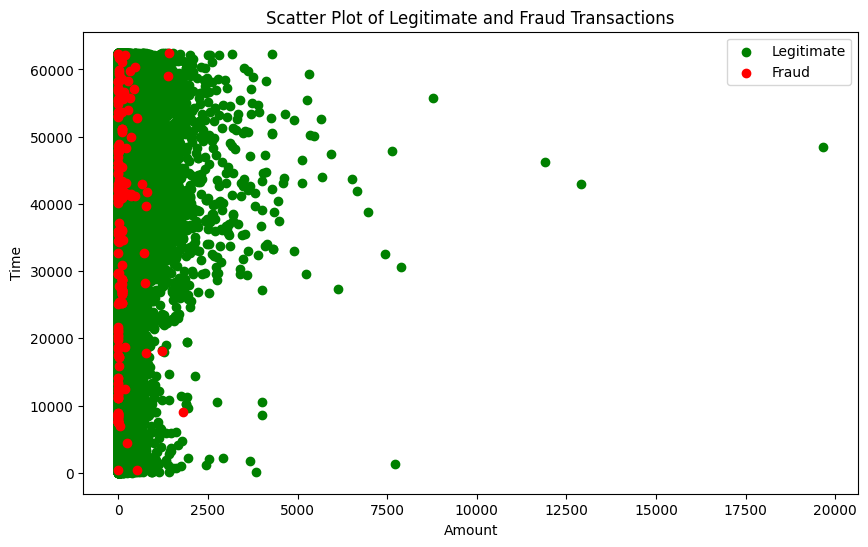

In [ ]:
# prompt: give a scatter plot for legitmante and fraud transaction

import matplotlib.pyplot as plt

# Separate legitimate and fraud transactions
legit = credit_card_data[credit_card_data['Class'] == 0]
fraud = credit_card_data[credit_card_data['Class'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(legit['Amount'], legit['Time'], c='green', label='Legitimate')
plt.scatter(fraud['Amount'], fraud['Time'], c='red', label='Fraud')

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter Plot of Legitimate and Fraud Transactions')
plt.legend()

# Show plot
plt.show()


**MACHINE LEARNING MODELS**
*   RANDOM FOREST
*   LOGICAL REGRESSION
*   DECISSION TREE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [ ]:
decision_tree.fit(X_train, Y_train)
predictions_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

random_forest.fit(X_train, Y_train)
predictions_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  95.29411764705881
Decision Tree Score:  88.23529411764706


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [ ]:
confusion_matrix_dt = confusion_matrix(Y_test, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[37  6]
 [ 4 38]]


Confusion Matrix - Decision Tree
[[37  6]
 [ 4 38]]


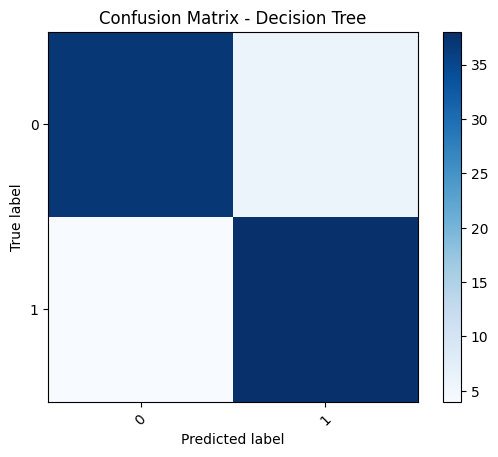

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix, classes=[0, 1], title="Confusion Matrix"):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Example usage:
confusion_matrix_dt = confusion_matrix(Y_test, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title="Confusion Matrix - Decision Tree")


Confusion Matrix - Decision Tree
[[37  6]
 [ 4 38]]


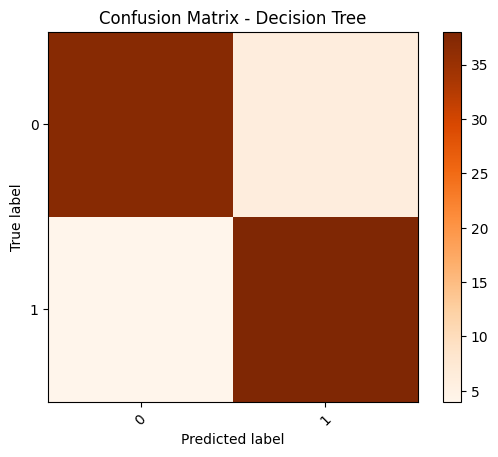

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix, classes=[0, 1], title="Confusion Matrix"):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='Oranges')  # Change 'Oranges' to your desired colormap
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Example usage:
confusion_matrix_dt = confusion_matrix(Y_test, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title="Confusion Matrix - Decision Tree")


**Evaluation of Decision Tree Model**


In [ ]:
print("Evaluation of Decision Tree Model")
print()
metrics(Y_test, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.88235
Precision: 0.86364
Recall: 0.90476
F1-score: 0.88372


Confusion Matrix - Random Forest
[[43  0]
 [ 4 38]]


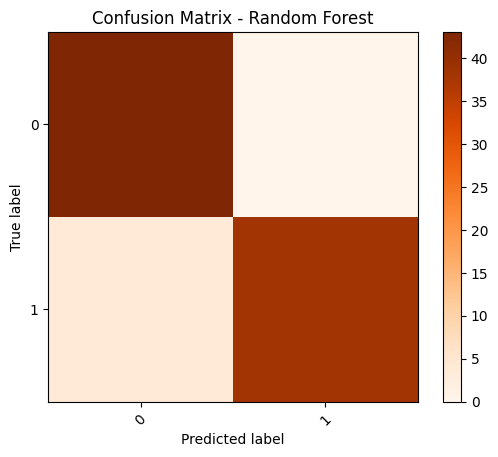

In [ ]:
confusion_matrix_rf = confusion_matrix(Y_test, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(Y_test, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.95294
Precision: 1.00000
Recall: 0.90476
F1-score: 0.95000


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter  # Import the Counter class
from sklearn.model_selection import train_test_split

# Assuming X and Y are your feature and target variables
# Replace these with your actual feature and target variables if they are named differently in your code

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(X_train, X_test, Y_train, Y_test) = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)


Resampled shape of X:  (422, 30)
Resampled shape of Y:  (422,)
Counter({0.0: 211, 1.0: 211})


In [ ]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(X_train, Y_train)

predictions_resampled = rf_resampled.predict(X_test)
random_forest_score_resampled = rf_resampled.score(X_test, Y_test) * 100

Confusion Matrix - Random Forest
[[66  3]
 [ 7 51]]


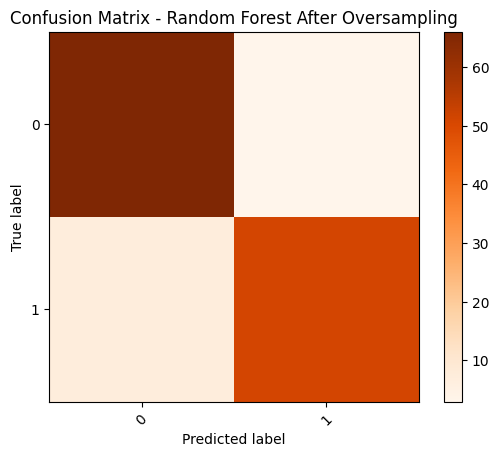

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, Y_train, Y_test are defined
# and you have already trained and tested your RandomForestClassifier

# Using SMOTE for oversampling
X_resampled, Y_resampled = SMOTE().fit_resample(X_train, Y_train)

# Training the RandomForestClassifier on the resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, Y_resampled)

# Making predictions on the test set
Y_predict = rf_model.predict(X_test)

# Confusion Matrix
cm_resampled = confusion_matrix(Y_test, Y_predict)
print("Confusion Matrix - Random Forest")
print(cm_resampled)

# Plotting the Confusion Matrix
plot_confusion_matrix(cm_resampled, classes=[0, 1], title="Confusion Matrix - Random Forest After Oversampling")


**Evaluation of Random Forest Model**

In [ ]:
print("Evaluation of Random Forest Model")
print()

metrics(Y_test, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.93701
Precision: 0.94643
Recall: 0.91379
F1-score: 0.92982


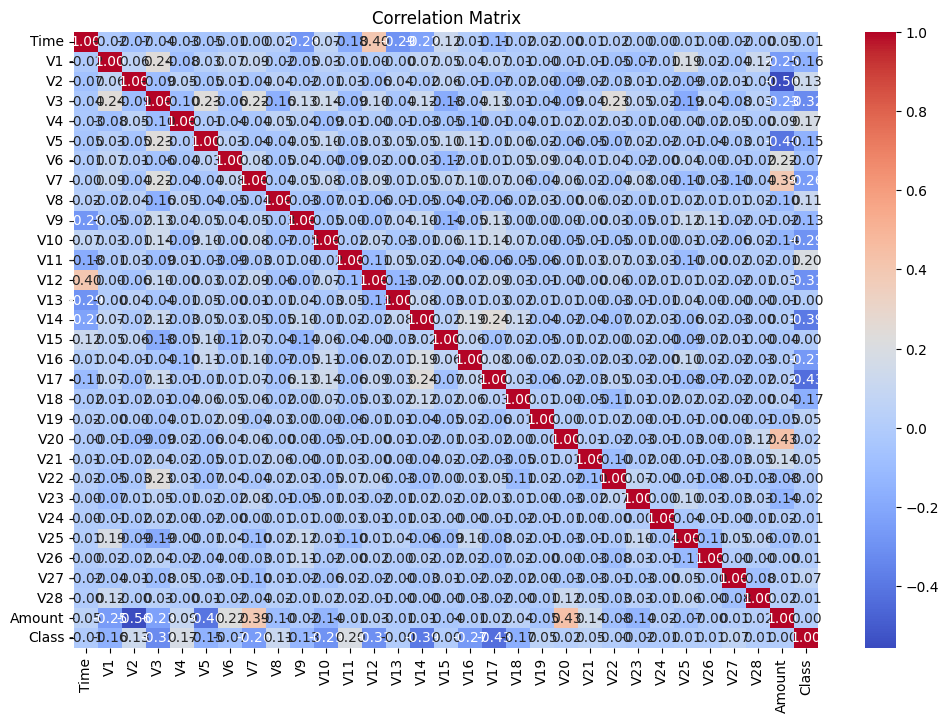

In [ ]:
import pandas as pd
#credit_card_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
# Assuming you have your data stored in a DataFrame called 'data'
# Replace 'data' with the name of your DataFrame
correlation_matrix = credit_card_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


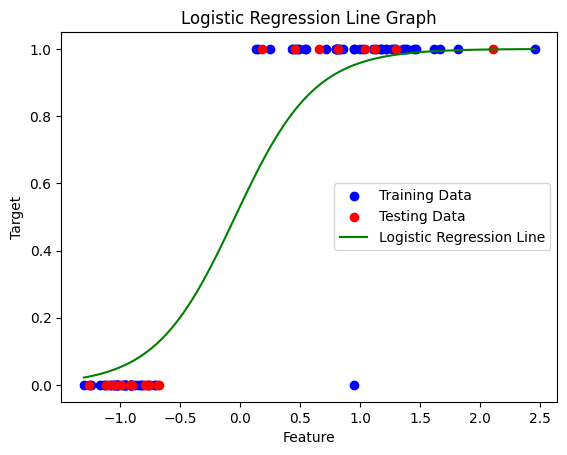

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generating some synthetic data
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Plotting the data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')

# Plotting the logistic regression line
X_line = np.linspace(X.min(), X.max(), 100)
Y_line = model.predict_proba(X_line.reshape(-1, 1))[:, 1]
plt.plot(X_line, Y_line, color='green', label='Logistic Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Logistic Regression Line Graph')
plt.legend()
plt.show()

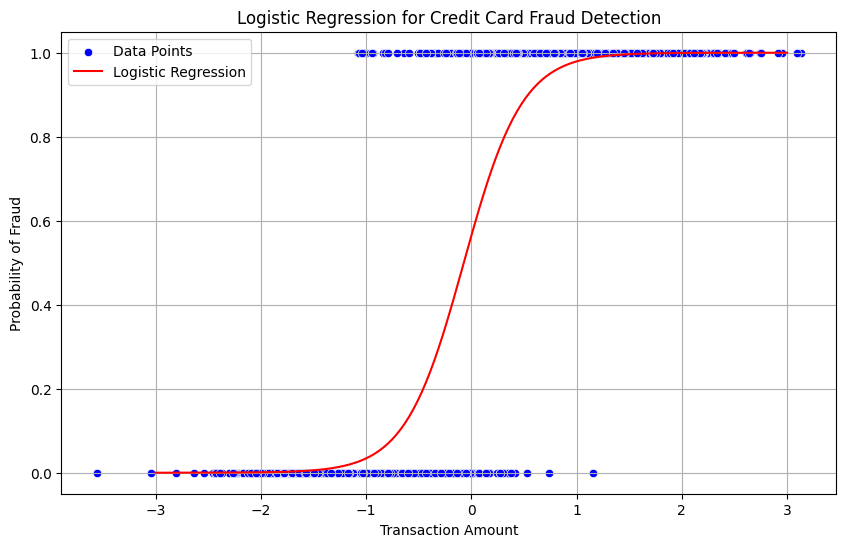

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate some synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate new data points for prediction
X_new = np.linspace(-3, 3, 300)
X_new = X_new.reshape(-1, 1)

# Predict probabilities for the new data points
probs = model.predict_proba(X_new)[:, 1]

# Plot the data points and logistic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=y, marker='o', color='blue', label='Data Points')
plt.plot(X_new, probs, color='red', label='Logistic Regression')
plt.xlabel('Transaction Amount')
plt.ylabel('Probability of Fraud')
plt.title('Logistic Regression for Credit Card Fraud Detection')
plt.legend()
plt.grid(True)
plt.show()
